<a href="https://colab.research.google.com/github/Niko0w0/colabNotebook/blob/main/Perceptron_%E6%84%9F%E7%9F%A5%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考csdn](https://blog.csdn.net/qq_38253837/article/details/109469467)

1.0


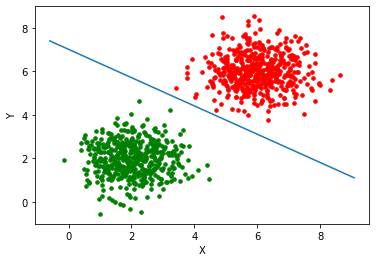

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def get_data(num): # 在(2，2)和(6, 6)周围生成点的个数是 num / 2 个
  data = [] # 存放随机生成的坐标 Xn
  label = [] # 存放数据的标签， -1 或者 +1
  x1 = np.random.normal(2, 0.8, int(num / 2))
  y1 = np.random.normal(2, 0.8, int(num / 2)) # 在点 (2, 2) 周围生成点
  x2 = np.random.normal(6, 0.8, int(num / 2))
  y2 = np.random.normal(6, 0.8, int(num / 2)) # 在点 (6, 6) 周围生成点，保证生成的点是可被划分的
  for i in range(num):
    if i < num / 2: # 在(2, 2)周围生成点
      data.append([x1[i], y1[i]])
      label.append(-1)
    else: # 在(6, 6)周围生成点
      data.append([x2[int(i - num / 2)], y2[int(i - num / 2)]])
      label.append(1)
  return data, label

def perceptron(data, label, eta):
  w = [0., 1.0] # 直线 x 和 y 的系数
  b = 0.
  separated = False # 标记是否已将点完全分离
  while not separated:
    separated = True
    for i in range(len(data)):
      if label[i] * (w[0] * data[i][0] + w[1] * data[i][1] + b) <= 0:
        separated = False # 没有完全分离
        w[0] += eta * label[i] * data[i][0] # 更新 w 的值
        w[1] += eta * label[i] * data[i][1]
        b += eta * label[i] # 更新 b 的值
  slope = -w[0] / w[1]    # 斜率
  intercept = -b / w[1]   # 截距
  return slope, intercept

def acc(num, data, label, slope, intercept):
  cnt = 0
  data_mat = np.array(data)
  X = data_mat[:, 0]
  Y = data_mat[:, 1]
  for i in range(num):
    if i < num / 2:
      if X[i] * slope + intercept > Y[i]:
        cnt = cnt + 1
    else:
      if X[i] * slope + intercept < Y[i]:
        cnt = cnt + 1
  return cnt / num

def plot(data, label, slope, intercept):
  plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体
  plt.rcParams['axes.unicode_minus'] = False
  plt.xlabel('X')
  plt.ylabel('Y')
  area = np.pi * 2 ** 2 # 点的面积

  data_mat = np.array(data)
  X = data_mat[:, 0]
  Y = data_mat[:, 1]
  for i in range(len(label)):
    if label[i] > 0:
      plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='red')  # 画点
    else:
      plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='green')
  # 根据斜率和截距画出直线
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals)
  plt.show()

num = 1000
data, label = get_data(num) # 生成数据和标签
slope, intercept = perceptron(data, label, 1) # 训练模型，得到直线的斜率和截距
accuracy = acc(num, data, label, slope, intercept) # 计算准确率
print(accuracy)
plot(data, label, slope, intercept) # 画出点和直线